(0.9277106397062831+0j)
(0.826836291905918+0j)
(-0.00543979030243831+0.5706159766532517j)
(-0.00543979030243831-0.5706159766532517j)
(-0.4436673510073228+0j)
0.826836291905918
0.09670690612403526


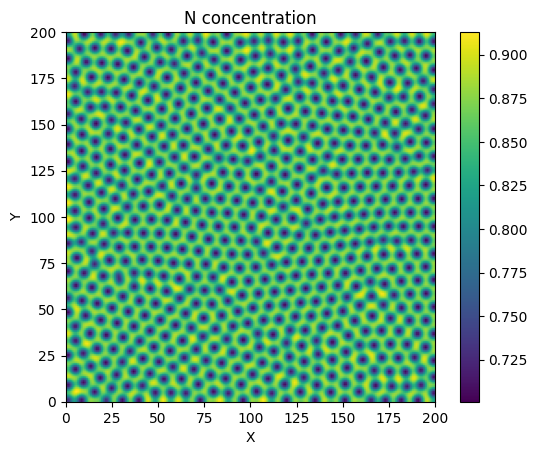

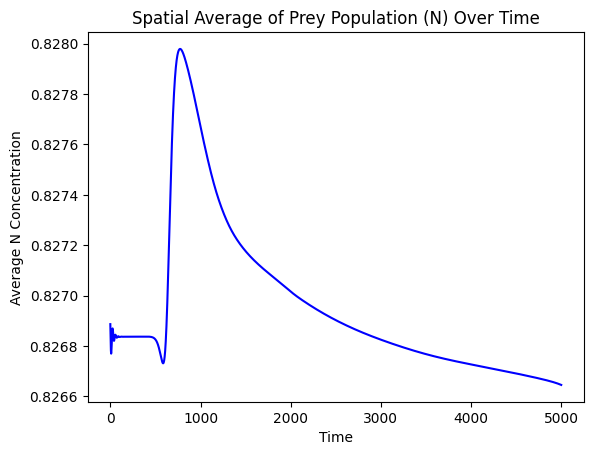

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton
# Set grid parameters
Lx, Ly = 200.0, 200.0  # Domain size
Nx, Ny = 200, 200    # Number of spatial grid points
dx, dy = Lx / Nx, Ly / Ny
dt = 0.01

Tmax = 5000.0          # Maximum simulation time
Nt = int(Tmax / dt)

# Define constants
eta=1
h=0.5
beta=0.3
d=0.14
sigma=0.78
alpha=9.0




coeff = [
    (-alpha/sigma),
    (alpha/sigma+(alpha/sigma)*beta),
   (-alpha/sigma)*beta,
    1,0,
    -sigma / (1 - sigma * h)
]

# Use numpy's roots function to find the roots
roots = np.roots(coeff)

# Filter for the smallest positive real root
smallest_positive_real_root = None
for root in roots:
    print(root)
    if np.isreal(root) and root > 0:
        if smallest_positive_real_root is None or root < smallest_positive_real_root:
            smallest_positive_real_root = root
n1 =smallest_positive_real_root.real
p1=(1/sigma)*n1*(1-n1)*(n1-beta)

print(n1)
print(p1)




# Initialize arrays for N and P
N_new=np.maximum(0, np.random.rand(Nx, Ny))*(0.0001)
P_new=np.maximum(0, np.random.rand(Nx, Ny))*(0.00001)
# N =np.maximum(0, np.random.rand(Nx, Ny))
# # 
# P=np.maximum(0, np.random.rand(Nx, Ny))
# N=N+N_new
# P=P+P_new
# P=N/10
# N = (0.826836)
# # 
# P=(0.096706)
# N=0.826836291905918+N_new
# P=0.09670690612403526+P_new
N=n1+N_new
P=p1+P_new
spatial_average_N = []
time_values = []

# Create Laplacian operator
def laplacian(Z):
    Zxx = (np.roll(Z, 1, axis=0) - 2 * Z + np.roll(Z, -1, axis=0)) / dx**2
    Zyy = (np.roll(Z, 1, axis=1) - 2 * Z + np.roll(Z, -1, axis=1)) / dy**2
    return Zxx + Zyy
    

# Perform time-stepping
for t in range(Nt):
    
    
    # Enforce boundary conditions (∂N/∂ν = ∂P/∂ν = 0)
    N[0, :] = N[1, :]
    N[-1, :] = N[-2, :]
    N[:, 0] = N[:, 1]
    N[:, -1] = N[:, -2]
    P[0, :] = P[1, :]
    P[-1, :] = P[-2, :]
    P[:, 0] = P[:, 1]
    P[:, -1] = P[:, -2]
    spatial_average_N.append(np.mean(N))
    # print(spatial_average_N[-1])
    time_values.append(t * dt)
    # Compute Laplacians
    laplace_N = laplacian(N)
    laplace_P = laplacian(P)

    # Update N and P using the given PDEs
    dN = N * (1 - N) * (N - beta) - ( ((1 + alpha * P) * P * N**2) / (1 + h * (1 + alpha * P) * N**2)) +laplace_N
    dP = eta * P * ((1 + alpha * P) * N**2 / (1 + h * (1 + alpha * P) * N**2) - sigma) +d * laplace_P

    N += dt * dN
    P += dt * dP

# Plot the result for variable N
plt.imshow(N, extent=[0, Lx, 0, Ly], origin='lower', cmap=plt.get_cmap('viridis'))
plt.colorbar()
plt.title("N concentration")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
# for value in time_values:
#     print(value)
plt.title("Spatial Average of Prey Population (N) Over Time") 
plt.xlabel("Time") 
plt.ylabel("Average N Concentration") 
plt.plot(time_values,spatial_average_N, color ="blue") 
plt.show()
